In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import numpy as np

In [5]:
df=pd.read_csv("data/stud.csv")

### Preparing X and y varibale

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
x=df.drop("math_score",axis=1)
y=df["math_score"]

In [10]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [11]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [12]:
df_col=df.columns
for i in df_col:
    print(f"Categories in {i} variable: ",end=" ")
    print(df[i].unique())
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

Categories in gender variable:  ['female' 'male']
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Categories in parental_level_of_education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Categories in lunch variable:  ['standard' 'free/reduced']
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Categories in test_preparation_course variable:  ['none' 'completed']
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Categories in math_score variable:  [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
 

In [21]:
numerical_feature=x.select_dtypes(exclude='object').columns
categorical_feature=x.select_dtypes(include='object').columns

In [22]:
cat_transformer=OneHotEncoder()
num_transformer=StandardScaler()
preprocessor=ColumnTransformer([("Onehotencoding",cat_transformer,categorical_feature),
                                ("Standardization",num_transformer,numerical_feature)])

In [23]:
x=preprocessor.fit_transform(x)

In [25]:
x.shape

(1000, 19)

In [20]:
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((800, 19), (800,), (200, 19), (200,))

In [50]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square
models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3402
- Mean Absolute Error: 4.2723
- R2 Score: 0.8735
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4214
- Mean Absolute Error: 4.2253
- R2 Score: 0.8792


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7091
- Mean Absolute Error: 4.5175
- R2 Score: 0.8554
-----------------------

In [51]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879216
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850519
8,AdaBoost Regressor,0.849404
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783497
4,Decision Tree,0.705575


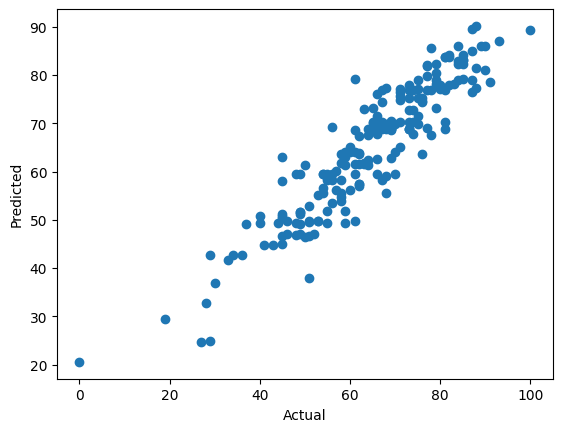

In [55]:
plt.scatter(y_test,y_test_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

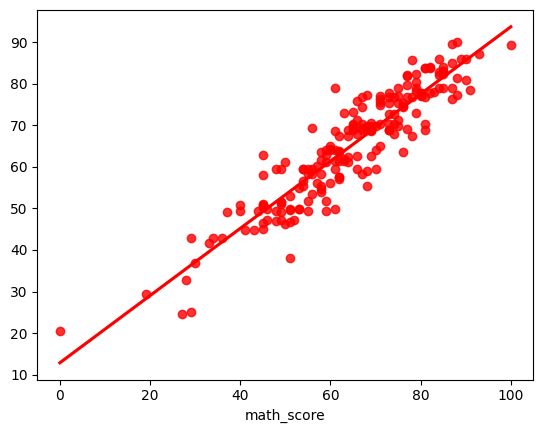

In [59]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red');